<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/06_Exercise_Job_Demand.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Analyzing Data Science Job Demand

## Topics Covered

This exercise goes over:

* Data cleaning and preparation 
* Data management
* Extract from datetime
* Pivot tables
* Index management

## Question

In our project we want to see how in-demand skills are trending for data jobs. But before we do that let's look at:
* General trend of data jobs in demand. We're going to look at it by month.

Load data.

In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Demand of Data Jobs

1. First step is we're only going to look at roles in the United States. So we're going to create a copy of our DataFrame and only include roles that are in the United States.

In [3]:
## Skill count per month for data analysts
df_US = df[df['job_country'] == 'United States'].copy()

2. Since we're getting the count by month we need to aggregate by month. We can do this by first extracting the month from our `job_posted_date` column.

In [4]:
# extract the month name from 'job_posted_date'
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

3. Next let's pivot by month and `job_title_short` and get the count. 

In [5]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [6]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,570,39,6032,2805,4899,50,1022,777,987,114
August,896,37,6654,3263,6284,71,1183,877,1509,192
December,660,41,4076,2616,3530,123,603,698,794,201
February,444,21,6117,2999,5007,62,1258,856,1132,91
January,529,34,8541,2590,6940,62,1554,765,1553,120
July,587,45,5178,2537,4852,66,873,741,1104,150
June,445,27,5683,2850,4672,43,1015,803,1050,97
March,434,20,6215,3127,4729,57,1120,845,1136,111
May,287,21,5010,2958,4389,48,852,736,897,89


4. Let's sort this

In [7]:
# sort job_posted_month_name in df_US_pivot by job_posted_month value
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,529,34,8541,2590,6940,62,1554,765,1553,120
February,444,21,6117,2999,5007,62,1258,856,1132,91
March,434,20,6215,3127,4729,57,1120,845,1136,111
April,570,39,6032,2805,4899,50,1022,777,987,114
May,287,21,5010,2958,4389,48,852,736,897,89
June,445,27,5683,2850,4672,43,1015,803,1050,97
July,587,45,5178,2537,4852,66,873,741,1104,150
August,896,37,6654,3263,6284,71,1183,877,1509,192
September,889,50,4651,3166,4627,116,793,776,1021,231


4. Let's now graph this.

Now we could plot all of this

<Axes: xlabel='job_posted_month'>

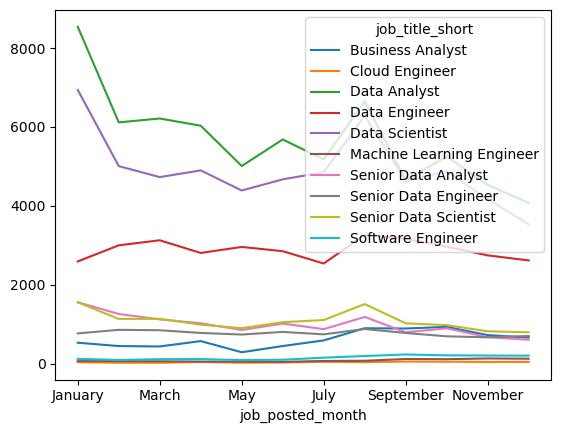

In [8]:
df_US_pivot.plot(kind='line')

Instead we'll just focus on the top 3 roles

In [9]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

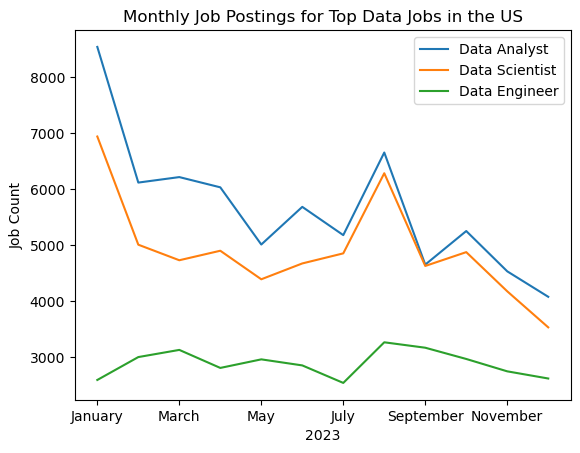

In [10]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

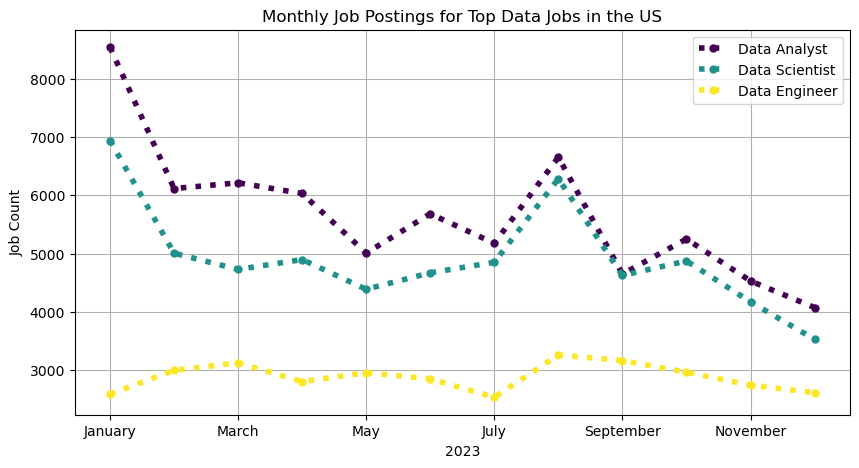

In [33]:
df_US_pivot[top_3].plot(
    kind='line',  
    linewidth=4, 
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5, 
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    figsize=(10, 5)
    )
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.grid()
plt.legend()
plt.show()